In [1292]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1293]:
#For supressing warnings
import warnings
warnings.filterwarnings ("ignore")

## Data Reading

In [1294]:
pd.set_option('display.max_columns',None) #To display all the columns
house_df=pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1295]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1296]:
#Information about the columns
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are some missing values present in the dataset and datatypes are int,float and object.

In [1297]:
#Statistical Summary
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1298]:
#To check the number of rows and columns
house_df.shape

(1460, 81)

 There is 1460 rows with 81 columns(1-Target variable and 80-Independent variable)

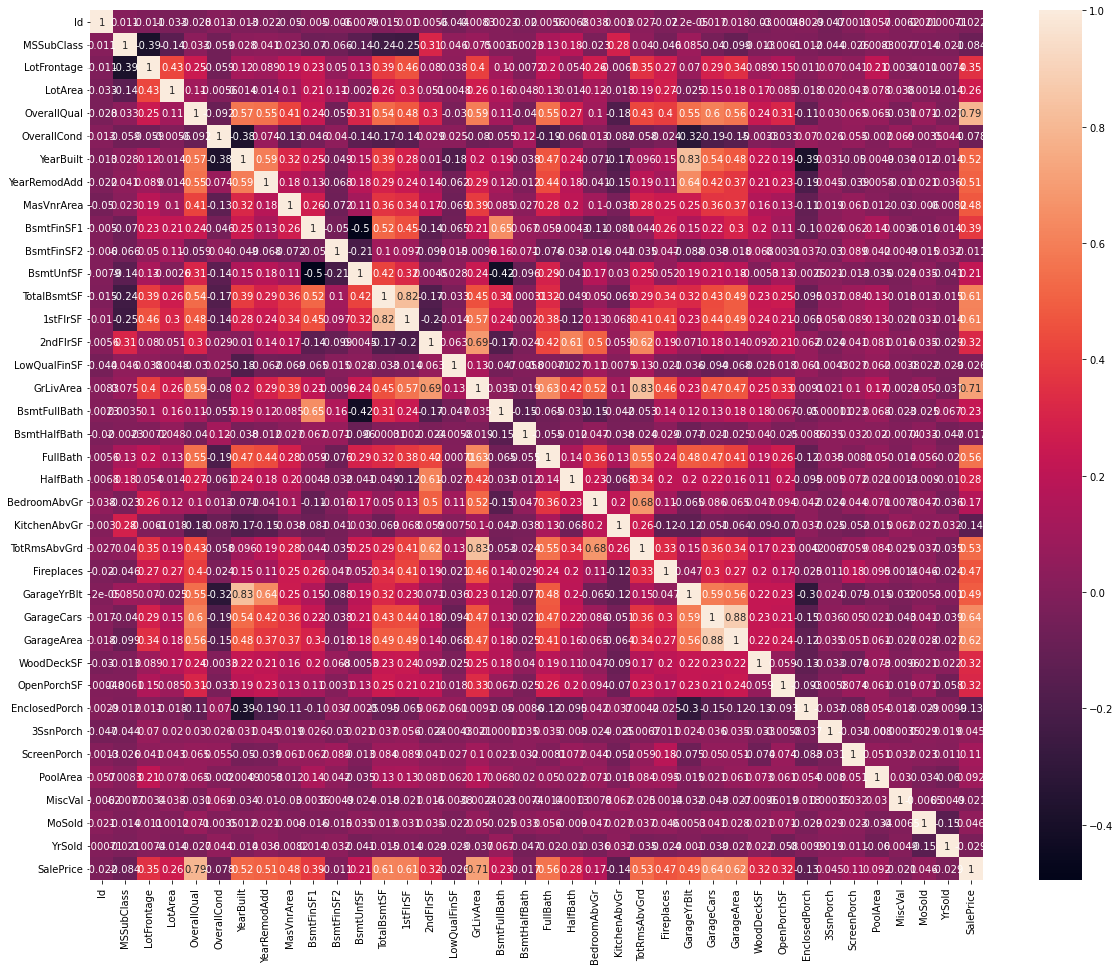

In [1299]:
plt.figure(figsize=(20,16))
sns.heatmap(house_df.corr(),annot=True)
plt.show()

OBSERVATION:
   
   Some of the features have high correlation with each other
   
        1.GarageCars and GarageArea (0.88)
        2.GarageYrBlt and YearBuilt (0.83)
        3.TotRmsAbvGrd and GrLivArea (0.83)
        4.TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

### Handling Missing Value

In [1300]:
#Checking missing value percentage
col_null=round(house_df.isnull().sum()/len(house_df)*100,2)
col_null[col_null!=0]


LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### Imputing Missing value

From the data dictionary:
            
   1.The attributes BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 holding "Nan" values can be imputed as "NoBasement".
    
   2.The attribute Alley consists of 3 unique values [nan 'Grvl' 'Pave'] and  "Nan" values can be imputed as "NoAlley".
    
   3.The attribute FireplaceQu holding "nan" values can be imputed with "No" since it denotes No fireplace.
   
   4.The attributes GarageType, GarageFinish, GarageQual, GarageCond holding "nan" values can be imputed as "No" since it denotes No Garage.
   
   5.The attribute PoolQc holding the "nan" values can be imputed as "NoPool".
   
   6.The attribute Fence holding "nan" values can be imputed as "NoFence".
   
   7.The attribute MiscFeature holding "nan" values can be imputed as "None".


In [1301]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    house_df[col].fillna("NoBasement",inplace=True)

In [1302]:
print(house_df.Alley.unique())

house_df.Alley.fillna("NoAlley",inplace=True)

[nan 'Grvl' 'Pave']


In [1303]:
print(house_df.FireplaceQu.unique())

house_df.FireplaceQu.fillna("No",inplace=True)

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [1304]:
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    house_df[col].fillna("NO",inplace=True)

In [1305]:
house_df.PoolQC.fillna("NoPool",inplace=True)

house_df.Fence.fillna("No",inplace=True)

house_df.MiscFeature.fillna("None",inplace=True)

In [1306]:
#Checking for remaining features with null values
col_null=round(house_df.isnull().sum()/len(house_df)*100,2)
col_null[col_null!=0]

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

In [1307]:
print(house_df.MasVnrType.unique())
print(house_df.MasVnrType.mode()[0])
print(house_df.MasVnrArea.mode()[0])

#MasVnrType denotes the Masonry veneer type and MasVnrArea represents its area in squarefeet.The 0.55% of the null values can be imputed as "No" to its type and 0 to its area. Since, the mode of the type is "None" and the corresponding area is 0.

house_df.MasVnrType.fillna("None", inplace = True)
house_df.MasVnrArea.fillna(0, inplace = True)

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
None
0.0


In [1308]:
house_df[house_df.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NoPool,No,None,0,5,2008,WD,Normal,167500


In [1309]:
#Since  only one row has missing value, we can either drop the row or impute with the mode since it a categorical variable.Here, we proceed with mode imputation.

print(house_df.Electrical.mode()[0])

house_df.Electrical.fillna(house_df.Electrical.mode()[0],inplace=True)


SBrkr


In [1310]:
#GarageYrBlt holding 5.55% of missing values can be imputed with 0 to indicate that those houses do have have garage.And year cannot be in float, hence changing the datatype to int.

print(house_df.GarageYrBlt.dtype)
house_df.GarageYrBlt.fillna(0, inplace = True)
house_df.GarageYrBlt=house_df.GarageYrBlt.astype(int)


float64


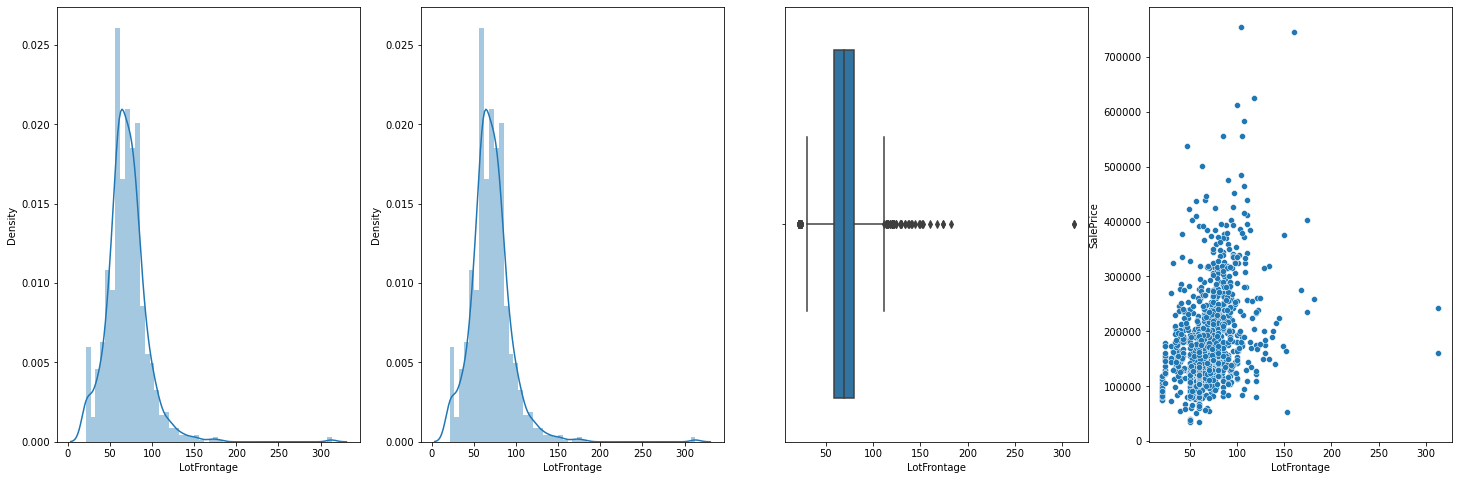

In [1311]:
# Plotting the feature LotFrontage to see its distribution and correlation with the target variable "SalePrice"

plt.figure(figsize=(25,8))
plt.subplot(1,4,1)
sns.distplot(house_df.LotFrontage)
plt.subplot(1,4,2)
sns.distplot(house_df.LotFrontage[~house_df.LotFrontage.isnull()])  # To see the distribution without the null values
plt.subplot(1,4,3)
sns.boxplot(house_df.LotFrontage[~house_df.LotFrontage.isnull()])
plt.subplot(1,4,4)
sns.scatterplot(house_df.LotFrontage[~house_df.LotFrontage.isnull()],house_df.SalePrice)
plt.show()



In [1312]:
#Let's check for the correlation between LotFrontage and SalePrice

house_df[~house_df.LotFrontage.isnull()][['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


Observation: There is a moderate correlation between the Saleprice and the LotFrontage, And from the above boxplot distribution, it is evident that
    it has got some outliers.Hence, not choosing the mean and will be imputing the missing value with median.

In [1313]:
house_df.LotFrontage.median()

69.0

In [1314]:
house_df.LotFrontage.fillna(house_df.LotFrontage.median(), inplace = True)

In [1315]:
pd.set_option('display.max_rows',None)
round(house_df.isnull().sum()/len(house_df)*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

There is no null values present in the dataset

In [1316]:
#Id column can be deleted since it contains the index number and it is no further usefull to the analysis.
house_df.drop(["Id"],axis=1,inplace=True)

### Derived Features

The year based columns can be derived with new features.
Following are the year based column in the dataset: YearBuilt, YearRemodAdd, YrSold, GarageYrBlt.
    

In [1317]:
 #YearBuilt - Denotes the original construction date.
 #YearRemodAdd - Denotes the Remodel date(If same as construction date, then no remodelling is done)

    #To determine the house has been remodelled after the built or not, we will be creating a user defined built_in function To find is there any difference between them.

def RM(a):
    if(a["YearBuilt"] == a["YearRemodAdd"]):
        return 0
    elif(a["YearBuilt"] < a["YearRemodAdd"]):
        return 1
    else:
        return 2

#"Remodelled" is the derived column from YearBuilt and YearRemodAdd. 0-represent, no remodelling is done and 1 represent remodelling is done.
house_df["Remodelled"]=house_df.apply(RM,axis=1)

#We can also subtract the YearBuilt and YearRemodAdd from the current year, to determine the current age of the property into 2 derived features.


In [1318]:
#Defining a build_in function to calculate the age of the property when it is sold.

def Age(a):
    if(a["YearBuilt"] == a["YearRemodAdd"]):
        return (a["YrSold"]-a["YearBuilt"])
    else:
        return (a["YrSold"]-a["YearRemodAdd"])
    
#"Age_BuildOrRemod" is the derived column to represent the age.
house_df["Age_BuildOrRemod"] = house_df.apply(Age,axis=1)


In [1319]:
#Defining a function to calculate whether the Garage in the property is new or old.
#And we consider Garage Yr Built less than 2000 will be considered as old(0) else new(1).

def garagebuilt(a):
    if a == 0:   # The value we have imputed as 0 will also be considered here as 0.
        return 0
    elif a < 2000:
        return 0
    else:
        return 1
    
#"NewOrOld_Garage" is the derived column that indicate the Garge is old or new.
house_df["NewOrOld_Garage"]=house_df["GarageYrBlt"].apply(garagebuilt)


In [1320]:
house_df[["Remodelled","Age_BuildOrRemod","NewOrOld_Garage"]].head()

,Remodelled,Age_BuildOrRemod,NewOrOld_Garage
0,0,5,1
1,0,31,0
2,1,6,1
3,1,36,0
4,0,8,1


In [1321]:
#As we have derived new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt.We will be dropping these features.

house_df.drop(["YearBuilt", "YearRemodAdd", "YrSold","GarageYrBlt"],axis=1,inplace=True)

In [1322]:
#Checking for Duplicates

house_df[house_df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Remodelled,Age_BuildOrRemod,NewOrOld_Garage


No duplicate entries found

In [1323]:
house_df.shape

(1460, 79)

Removing categorical and numerical attributes that have more than 85% data belonging to one value.

Hence, its predictive power will be less.Lets remove these attributes from the dataset.

In [1324]:
#Column that has one value repeating more than 85% or (1460*85)/100)  = 1241 times as this will be skewed to one particular value, will be removed.

#User defined method to get the columns that have count of one value more than 85%

def valCount():
    col=[]
    columns=house_df
    for i in columns:
        if(house_df[i].value_counts().max() >= 1241):
            col.append(i)
    return col

colToBeRemoved = valCount()


In [1325]:
#Removing the columns that has skewed data

house_df.drop(colToBeRemoved, axis=1,inplace=True)

In [1326]:
house_df.shape

(1460, 49)

### Outlier Detection

Outlier calculation on the num_columns using iterative statement and functions are not possible here.

since there are some ordered categorical features as (int) datatype.Hence, it may mislead the values.

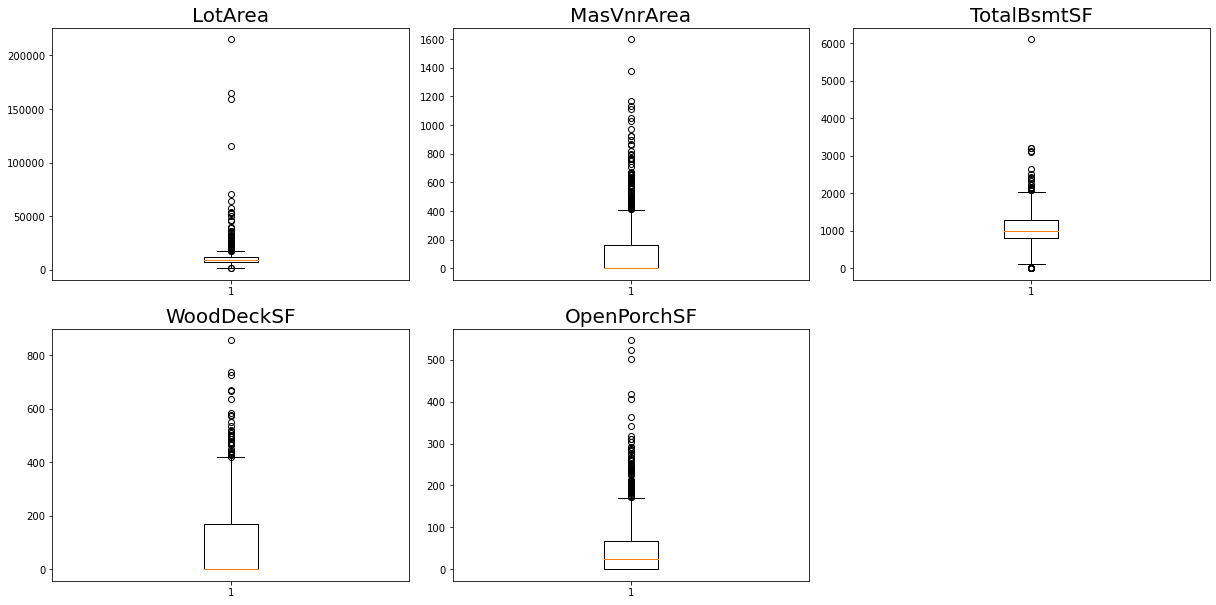

In [1327]:
#Checking the outliers in the numeric columns

plt.figure(figsize=(17,25))

plt.subplot(6,3,1)
plt.boxplot("LotArea",data=house_df)
plt.title("LotArea",fontsize=20) # The title of the plot

plt.subplot(6,3,2)
plt.boxplot("MasVnrArea",data=house_df)
plt.title("MasVnrArea",fontsize=20) # The title of the plot

plt.subplot(6,3,3)
plt.boxplot("TotalBsmtSF",data=house_df)
plt.title("TotalBsmtSF",fontsize=20) # The title of the plot

plt.subplot(6,3,4)
plt.boxplot("WoodDeckSF",data=house_df)
plt.title("WoodDeckSF",fontsize=20) # The title of the plot

plt.subplot(6,3,5)
plt.boxplot("OpenPorchSF",data=house_df)
plt.title("OpenPorchSF",fontsize=20) # The title of the plot

plt.tight_layout() # To avoid overlapping layout
plt.show() # To display the plot

In [1328]:
#Removing the Outliers

#Removing the value beyond 98% for the column LotArea
n_quartile_LotArea = house_df['LotArea'].quantile(0.98)
house_df = house_df[house_df['LotArea'] < n_quartile_LotArea]

#Removing the value beyond 98% for the column MasVnrArea
n_quartile_MasVnrArea = house_df['MasVnrArea'].quantile(0.98)
house_df = house_df[house_df['MasVnrArea'] < n_quartile_MasVnrArea]

#Removing the value beyond 99% for the column TotalBsmtSF
n_quartile_TotalBsmtSF = house_df['TotalBsmtSF'].quantile(0.99)
house_df = house_df[house_df['TotalBsmtSF'] < n_quartile_TotalBsmtSF]

#Removing the value beyond 99% for the column WoodDeckSF
n_quartile_WoodDeckSF = house_df['WoodDeckSF'].quantile(0.99)
house_df = house_df[house_df['WoodDeckSF'] < n_quartile_WoodDeckSF]

#Removing the value beyond 99% for the column OpenPorchSF
n_quartile_OpenPorchSF = house_df['OpenPorchSF'].quantile(0.99)
house_df = house_df[house_df['OpenPorchSF'] < n_quartile_OpenPorchSF]

In [1329]:
#To determine the percentage of data retained

data = round(100*(len(house_df)/1460),2)
print(data)

93.01


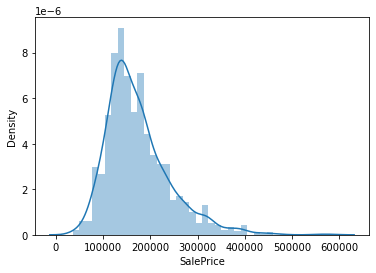

In [1330]:
#Visualizing the target variable "SalePrice"

sns.distplot(house_df.SalePrice)
plt.show()

The target variable "SalePrice" is right skewed with some noise.

In [1331]:
#Numeric columns are separated for Analysis
num_columns =  house_df.select_dtypes(include =["int64","float64"])
num_columns.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice',
       'Remodelled', 'Age_BuildOrRemod', 'NewOrOld_Garage'],
      dtype='object')

### Univariate and Bivariate Analysis - Numerical Features

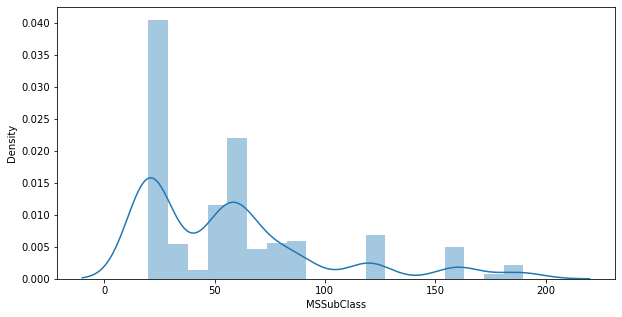

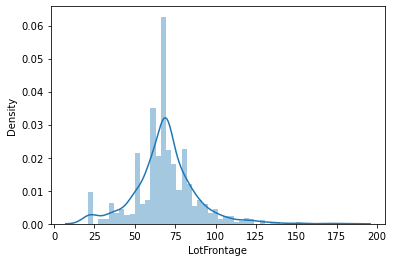

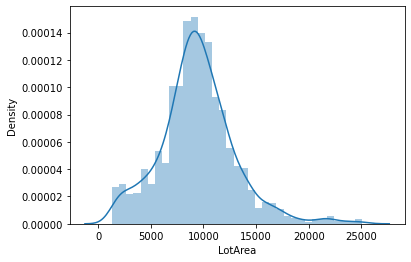

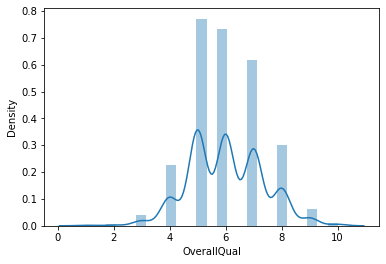

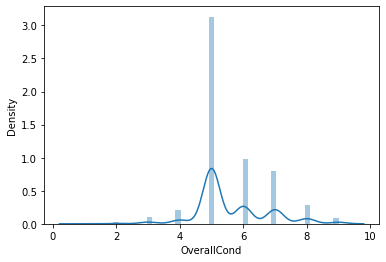

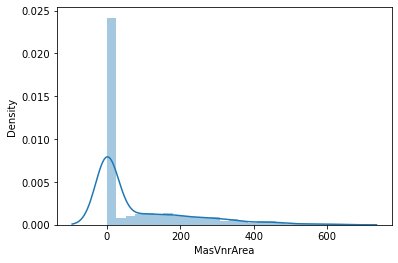

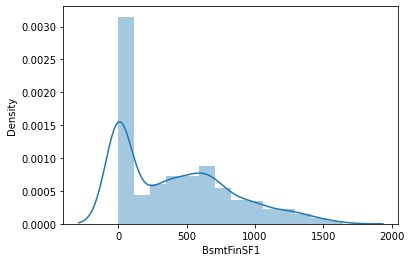

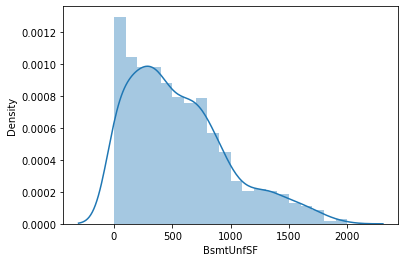

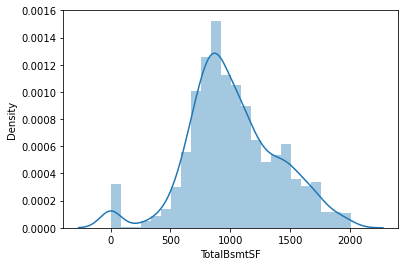

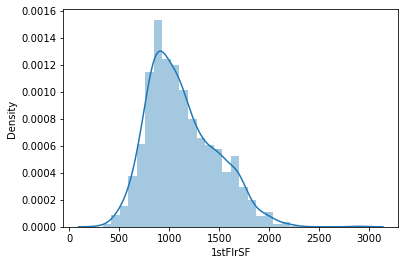

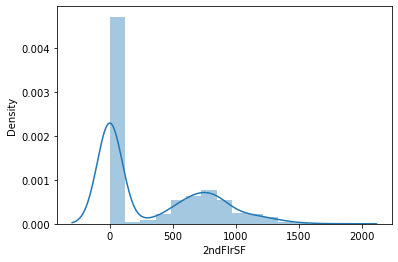

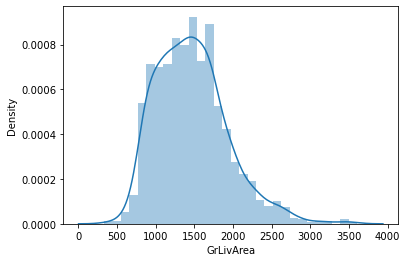

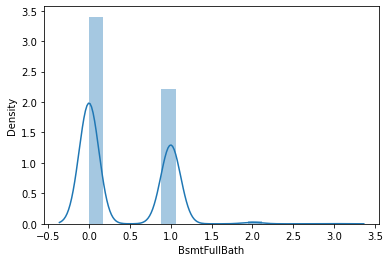

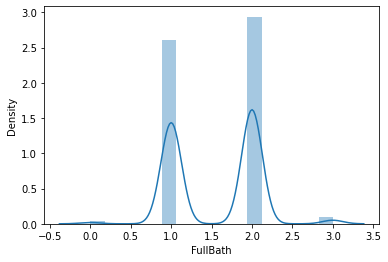

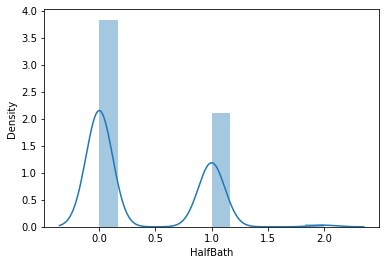

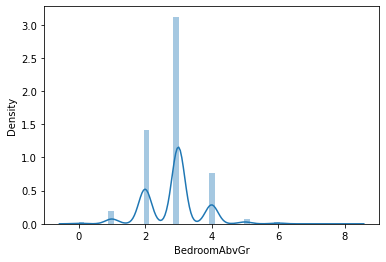

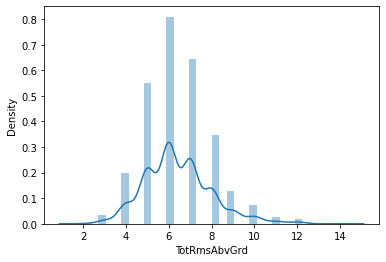

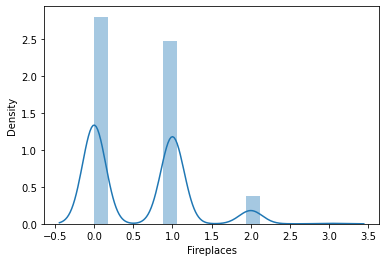

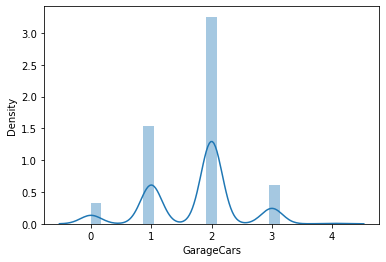

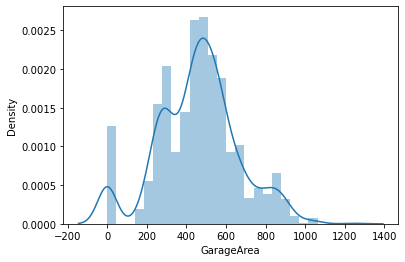

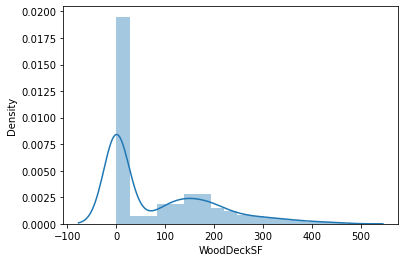

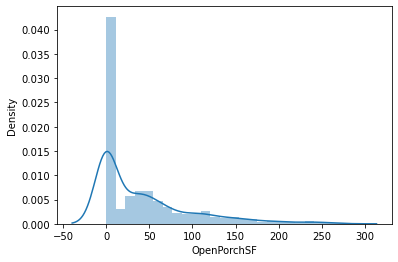

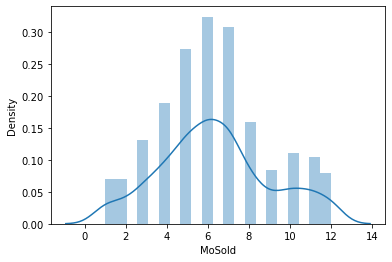

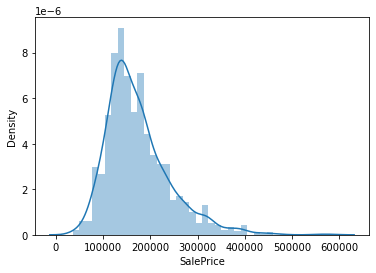

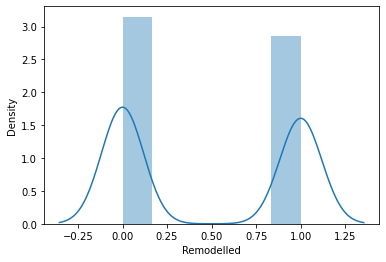

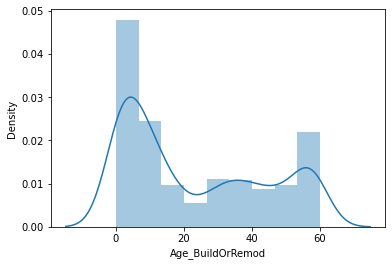

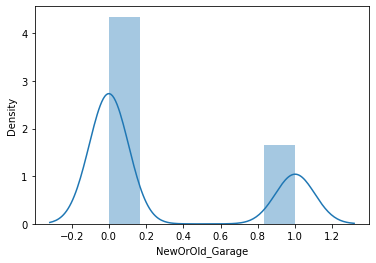

In [1332]:
#Visualizing the distribution of the numeric features.

fig=plt.subplots(figsize=(10,5))

for i in num_columns:
    sns.distplot(house_df[i])
    plt.show()

After the Bivariate Analysis, we can decide on removing the features based on their values.

<Figure size 720x360 with 0 Axes>

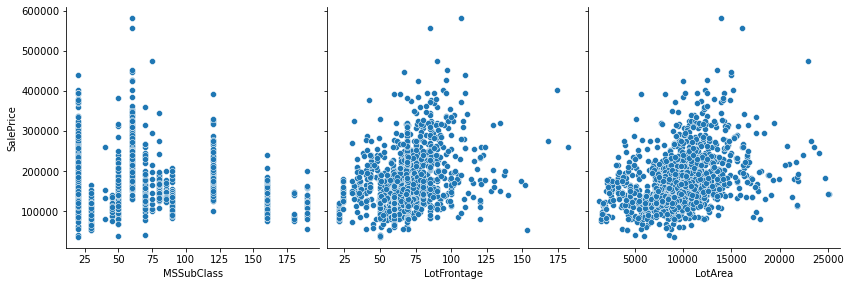

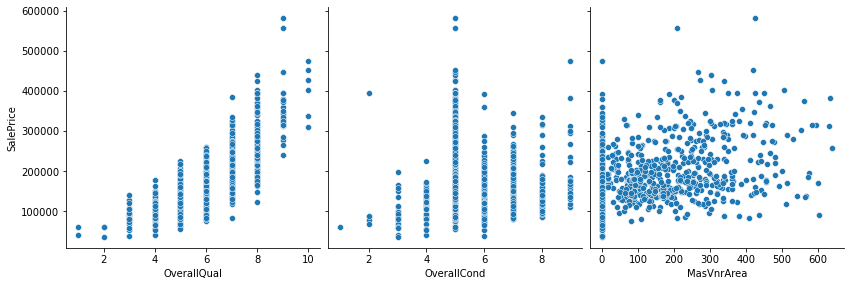

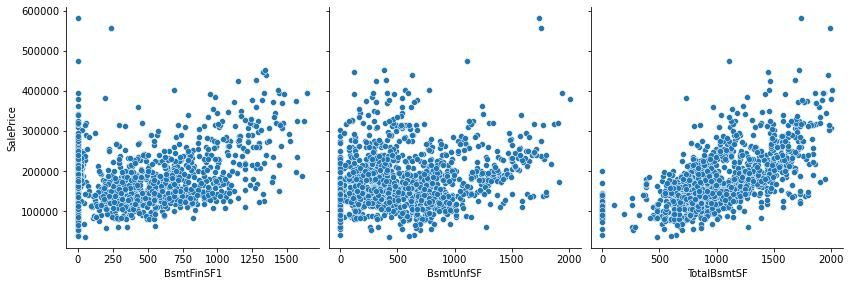

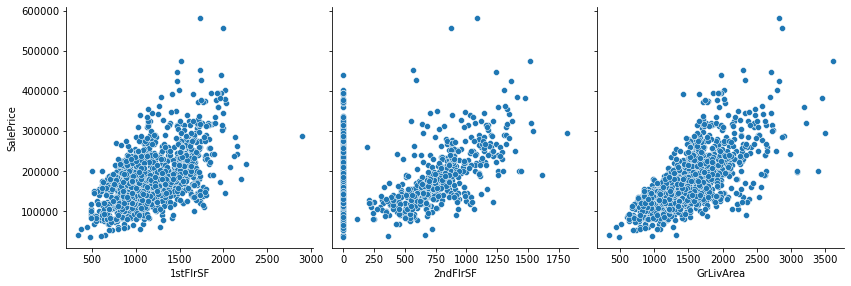

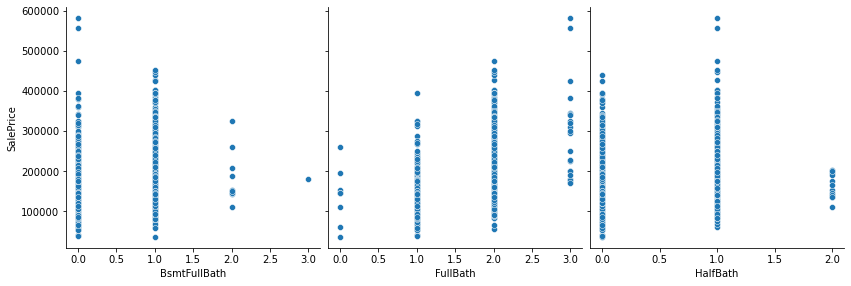

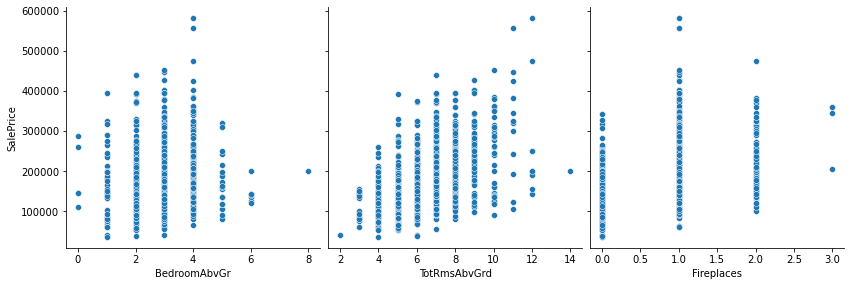

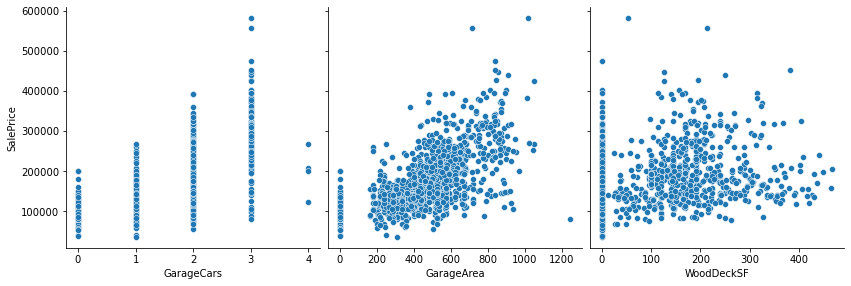

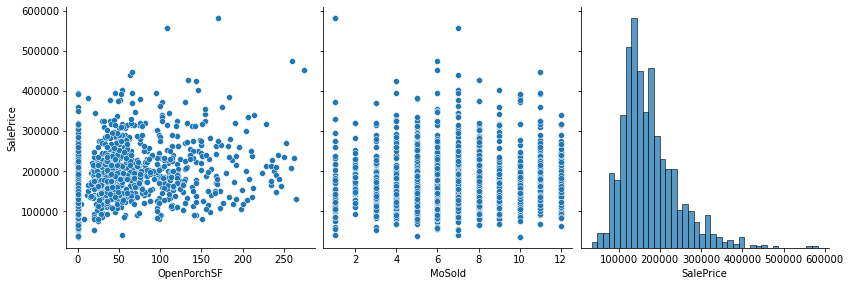

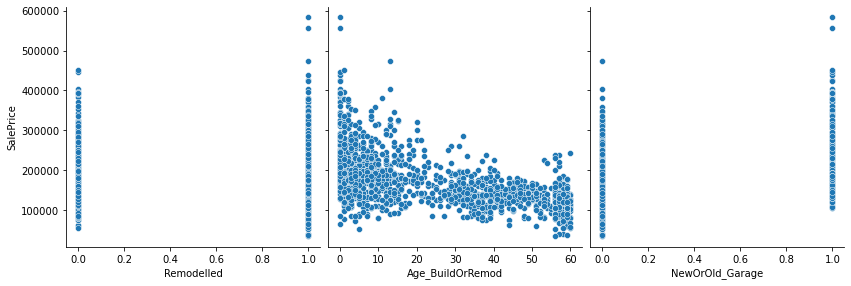

In [1333]:
#Analyzing the Numerical Features with the Target variable "SalePrice".
   
plt.figure(figsize=(10,5))

sns.pairplot(data=house_df,x_vars=['MSSubClass', 'LotFrontage', 'LotArea'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['OverallQual', 'OverallCond','MasVnrArea'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['BsmtFullBath', 'FullBath', 'HalfBath'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['GarageCars','GarageArea', 'WoodDeckSF'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['OpenPorchSF', 'MoSold', 'SalePrice'],y_vars="SalePrice",height=4)

sns.pairplot(data=house_df,x_vars=['Remodelled', 'Age_BuildOrRemod', 'NewOrOld_Garage'],y_vars="SalePrice",height=4)

plt.show() 
    


OBSERVATIONS:

Features like 1stFlrSF and GrLivArea seems to have positive correlation with SalePrice.

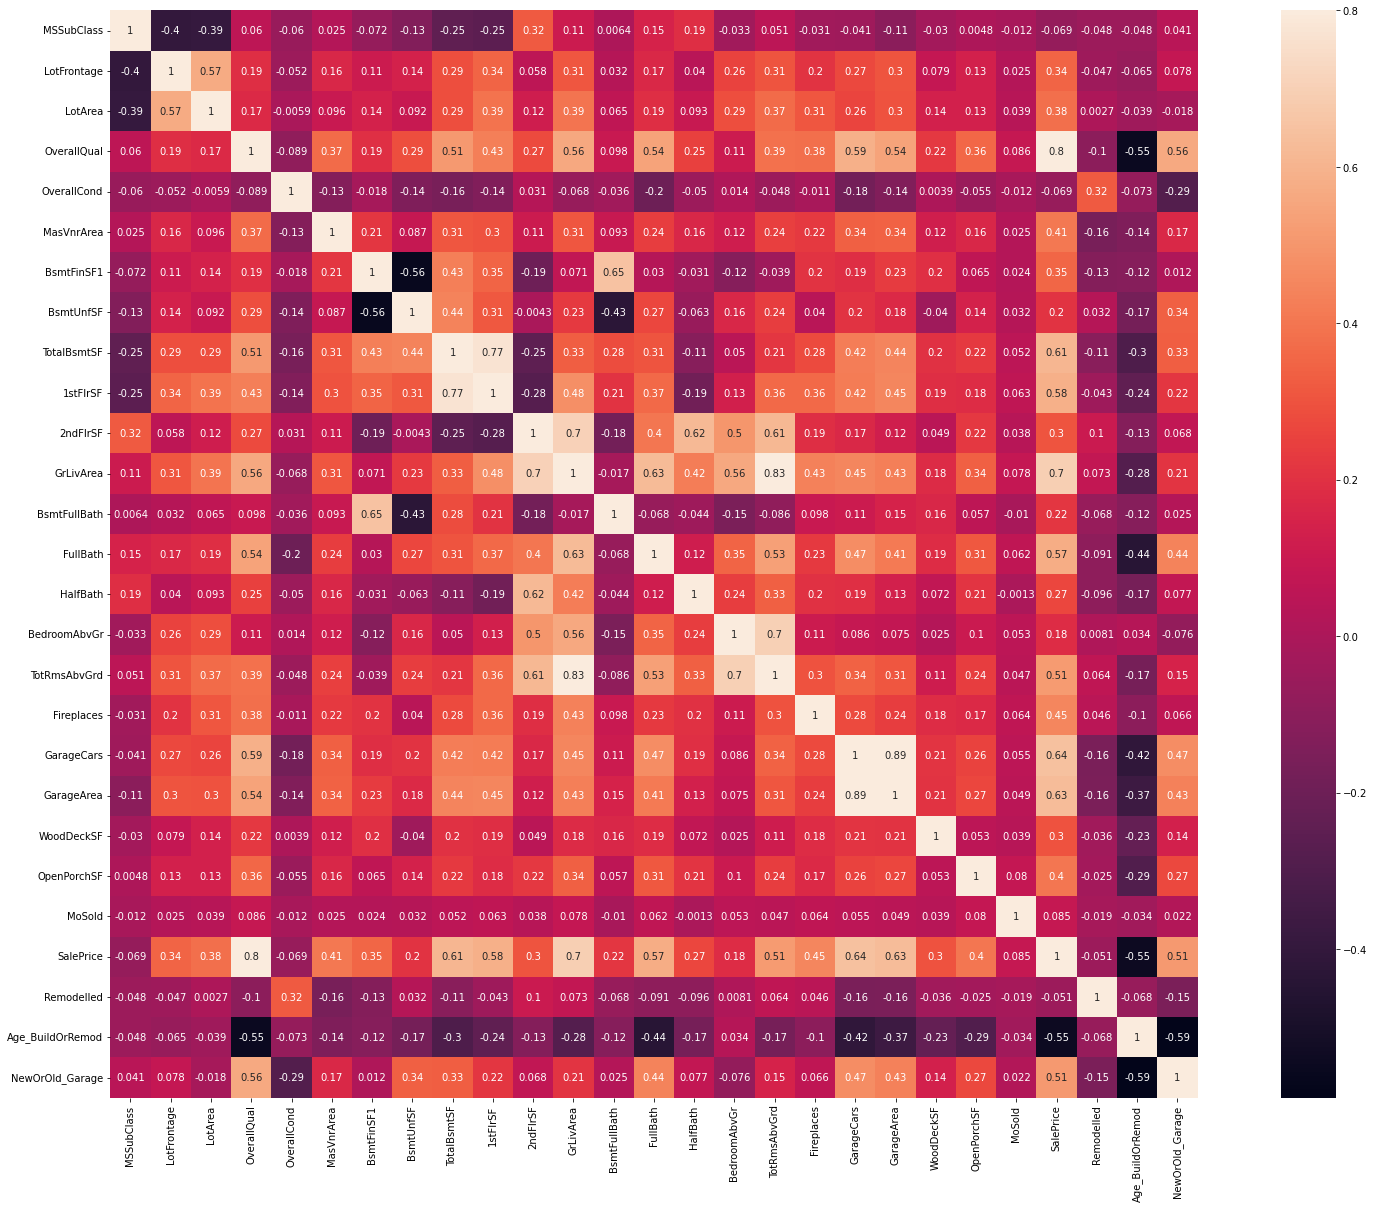

In [1334]:
#Multivariate Analysis: Correlation among all the Features

corrmat=house_df.corr()
f, ax =plt.subplots(figsize=(30,20))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True)
plt.show()

From the correlation map plotted in the beginning,Certain features can be deleted.

1.GarageCars and GarageArea (Correlation coefficient = 0.89), dropping GarageCars

2.TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea

3.TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.77), dropping TotalBsmtSF

In [1335]:
#Dropping the features
house_df.drop(['GarageCars', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(house_df.columns.shape)

(46,)


### Analyzing Categorical Features

In [1336]:
# Categorical features in the dataframe
cat_columns = house_df.select_dtypes(include=[ "object"])
cat_columns.columns


Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

### Univariate and Bivariate Analysis - Categorical Features

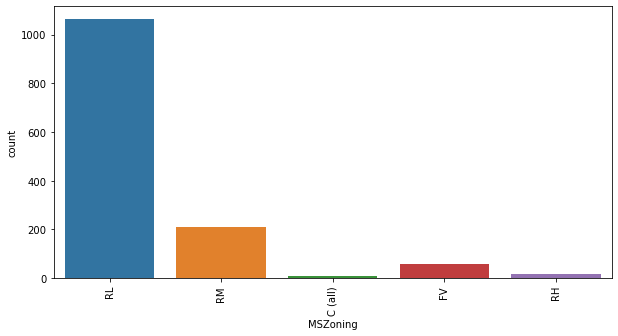

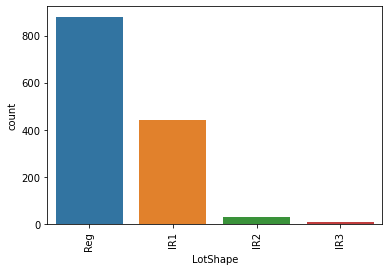

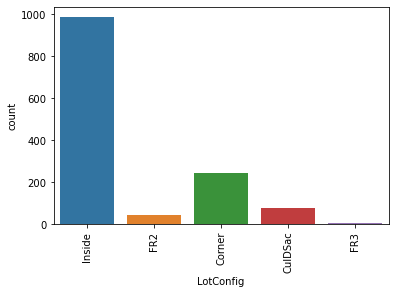

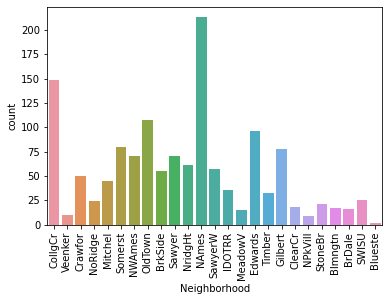

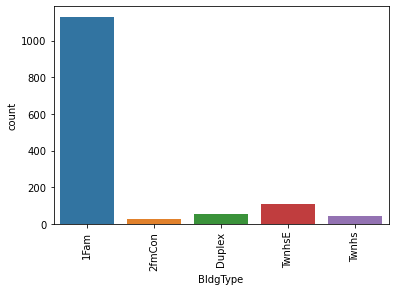

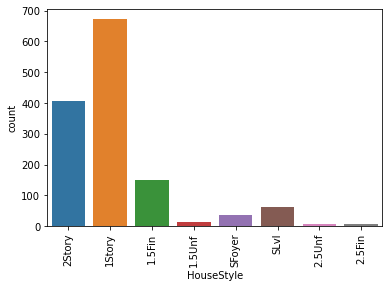

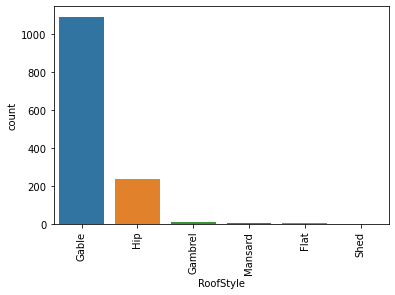

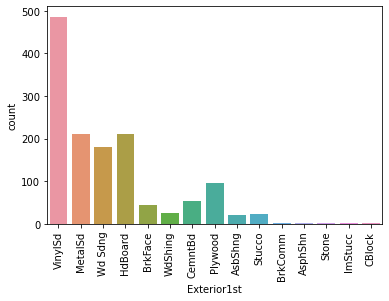

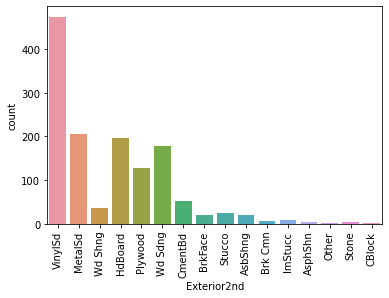

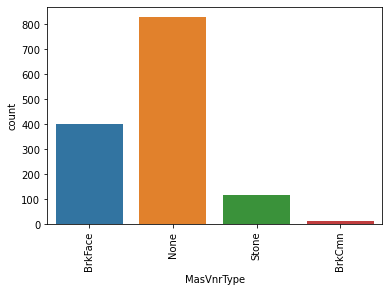

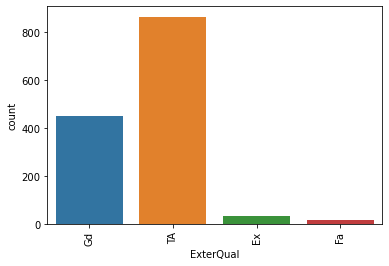

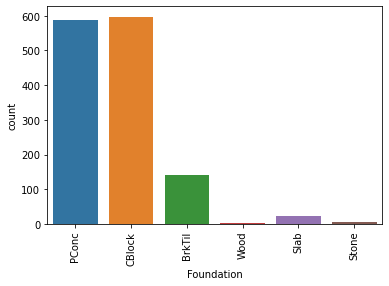

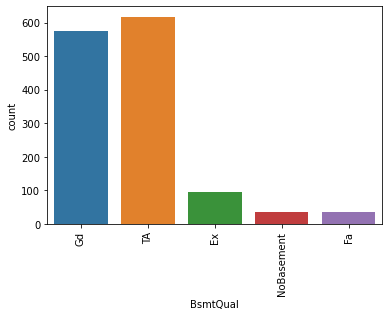

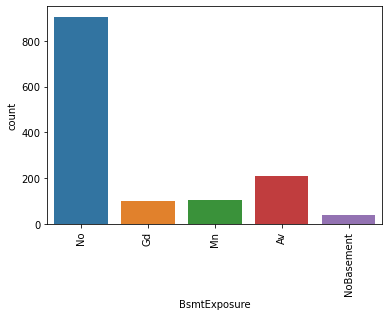

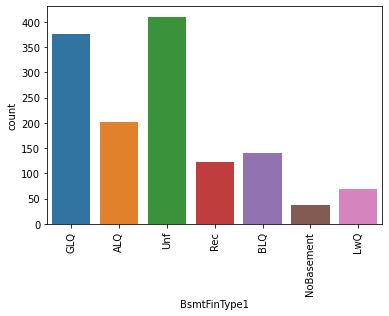

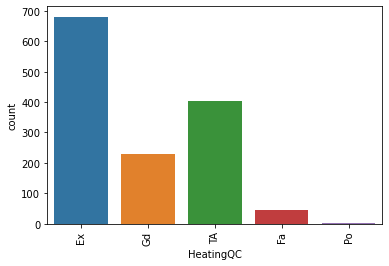

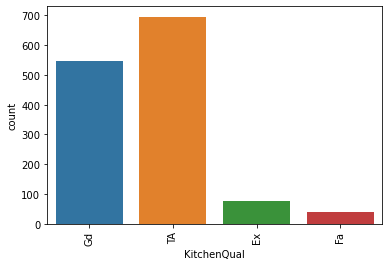

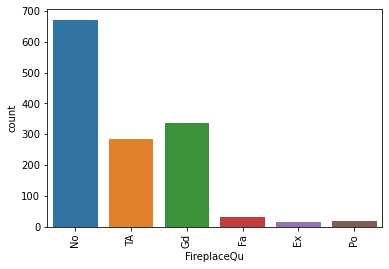

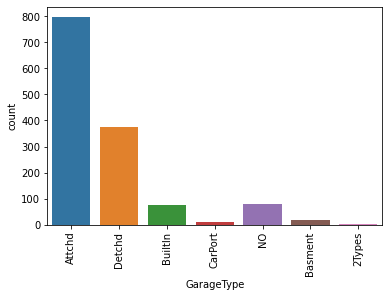

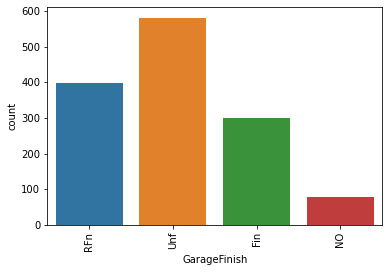

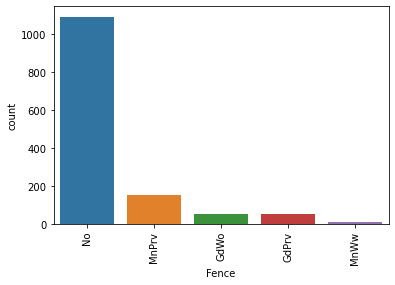

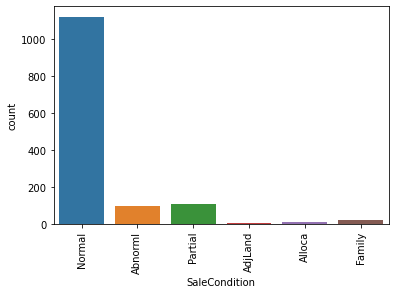

In [1337]:
#Visualizing the categorical features.

fig=plt.subplots(figsize=(10,5))

for i in cat_columns:
    sns.countplot(x=house_df[i],data=house_df)
    x=plt.xticks(rotation=90)
    plt.show()

OBSERVATIONS:
    
   - Most of the houses have RL-Residential Low Density.
   - General shape of the property is Regular for most of the houses.
   - Inside lot-Lot configuration is found in most of the houses.
   - Most of the houses have Names-North Ames as the Neighbourhood.
   - Single_family Detached is the type of dwelling in the BldgeType found most.
   - 1Story is the highest style of dwelling in the HouseStyle.
   - Gable is the highest roofstyle for most of the houses.
   - Vinyl Siding is the most seen exterior covering in the houses.
   - Most of the houses has the Average/Typical quality of material in the exterior.
   - Cinder Block and Poured Contrete is the type of foundation seen in most of the houses.
   - Most of the houses have the Excellemt Heating quality and TA-Typical/Average Kitchen quality.
   - Most of the houses have attached  but most are seen to be unfinished.
   - No fence is seen in most of houses and the condition of sale tend to be normal.
    
    
    
    
    

In [1338]:
# Defining a function to generate boxplot for the target variable 'SalePrice' against different features given the list.

def gen_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(house_df[feature],house_df['SalePrice'])
        x=plt.xticks(rotation=90)
        plt.tight_layout()
        


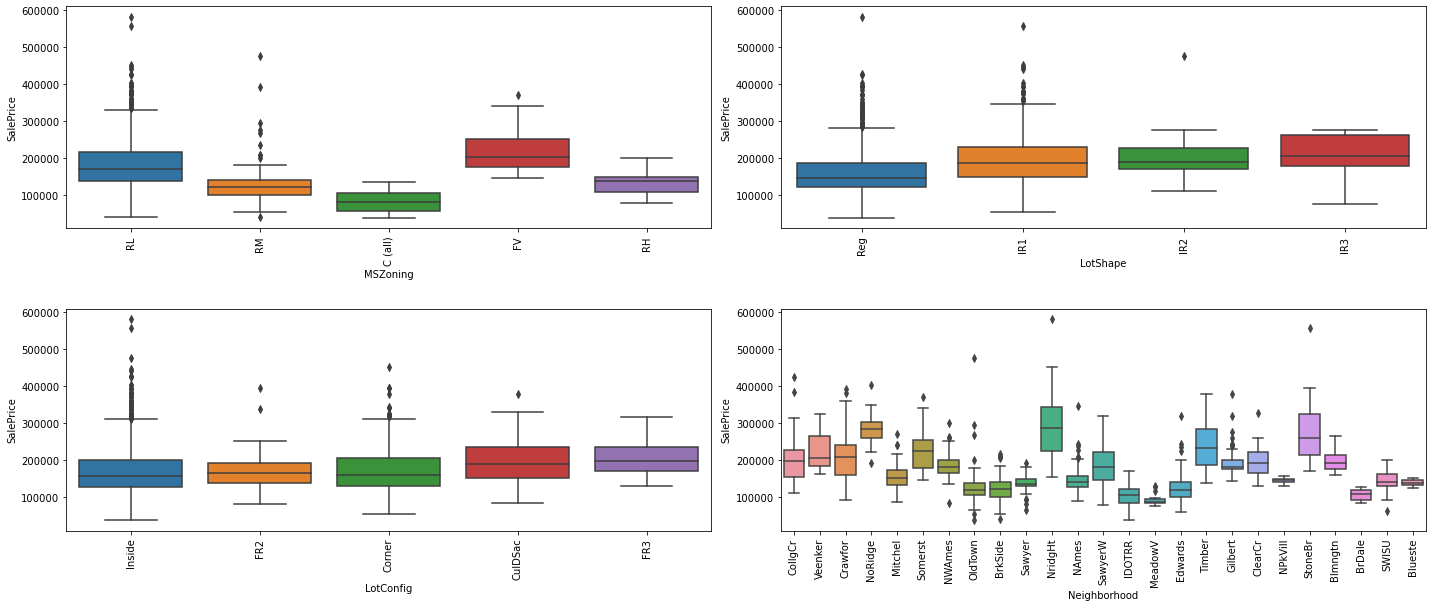

In [1339]:
#Data Visualization of Categorical data 

ext_col = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood']

gen_boxplot(ext_col)

OBSERVATIONS:
    
   - Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice.
   - Slightly irregular LotShape have the highest SalePrice.
   - Neighborhood has a lot of labels, Northridge Heights(NridgHt) have the high salePrice.

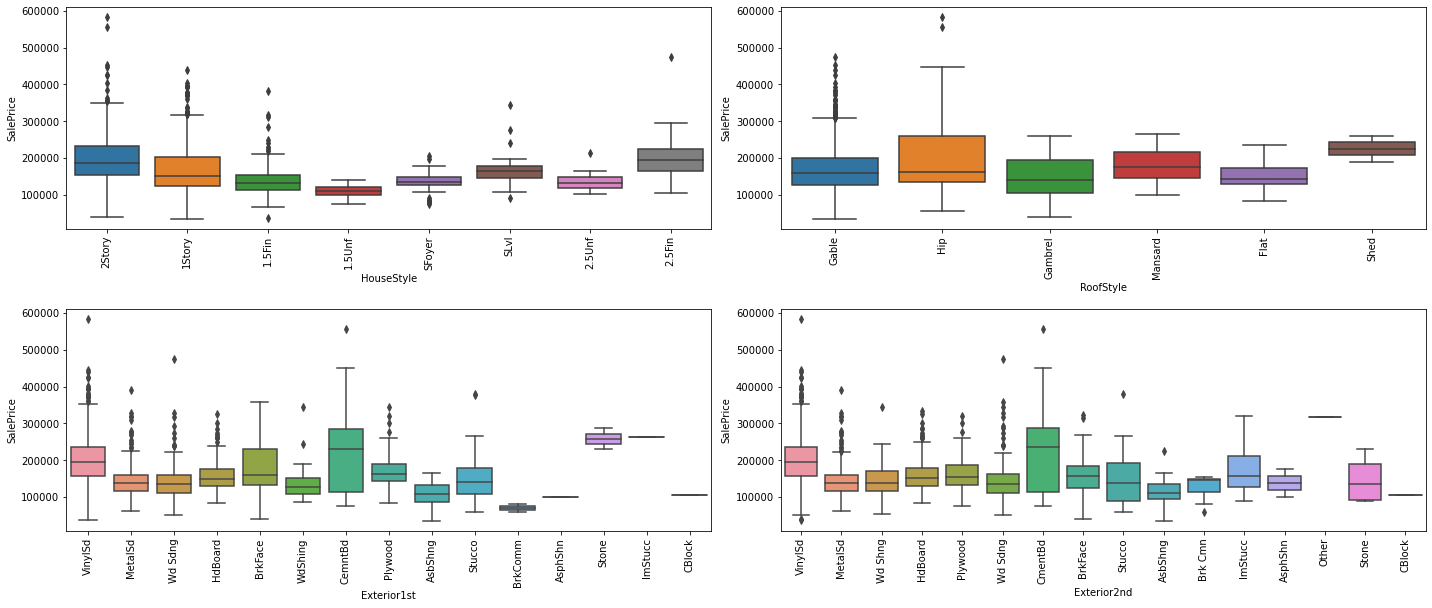

In [1340]:
ext_col = ['HouseStyle', 'RoofStyle', 'Exterior1st','Exterior2nd']

gen_boxplot(ext_col)

OBSERVATIONS:
    
   - 'HouseStyle' : 2 storied houses have the highest SalePrice.
   - 'Exterior1st' and ''Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

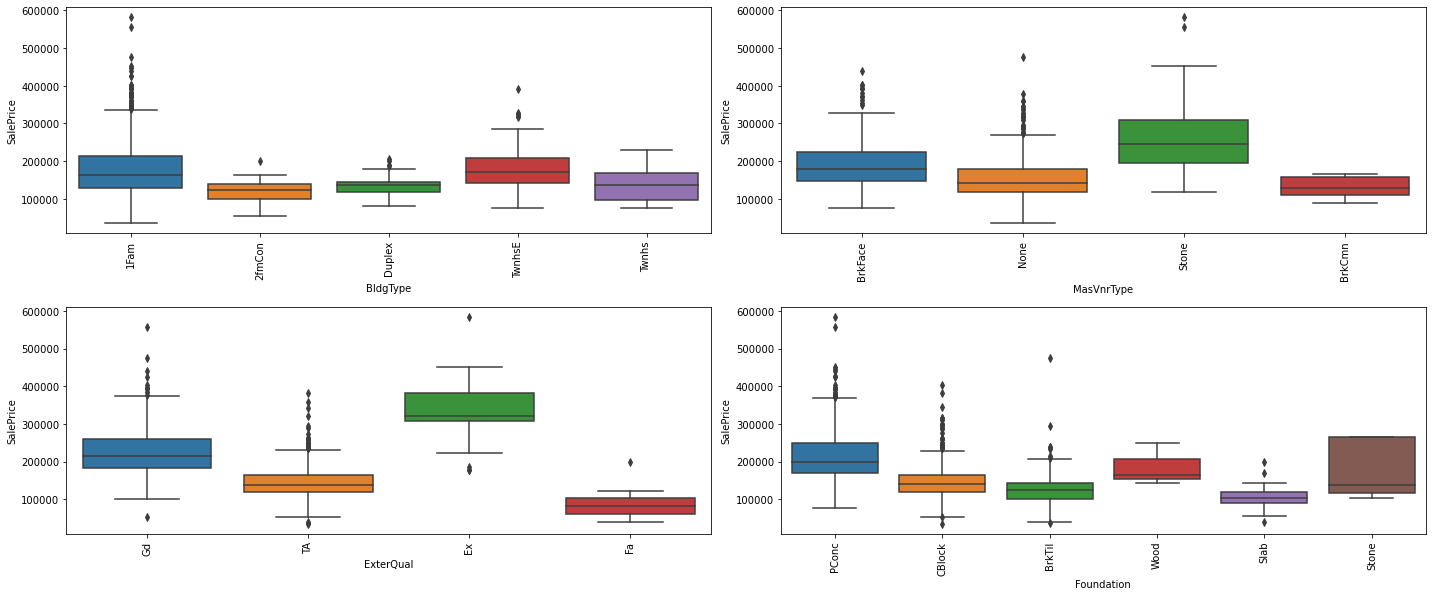

In [1341]:
ext_col = [ 'BldgType', 'MasVnrType','ExterQual', 'Foundation']

gen_boxplot(ext_col)

OBSERVATIONS:

   - Houses with 'Foundation' of poured concrete (Foundation = PConc) have the highest price.
   - Houses wil Single-family Detached(1Fam) in the 'BldgType' have the high SalePrice.
   - Houses with Stone in the 'MasVnrType' have the highest Price.
   - Excellent and Good quality of material on the 'ExterQual' have high SalePrice.

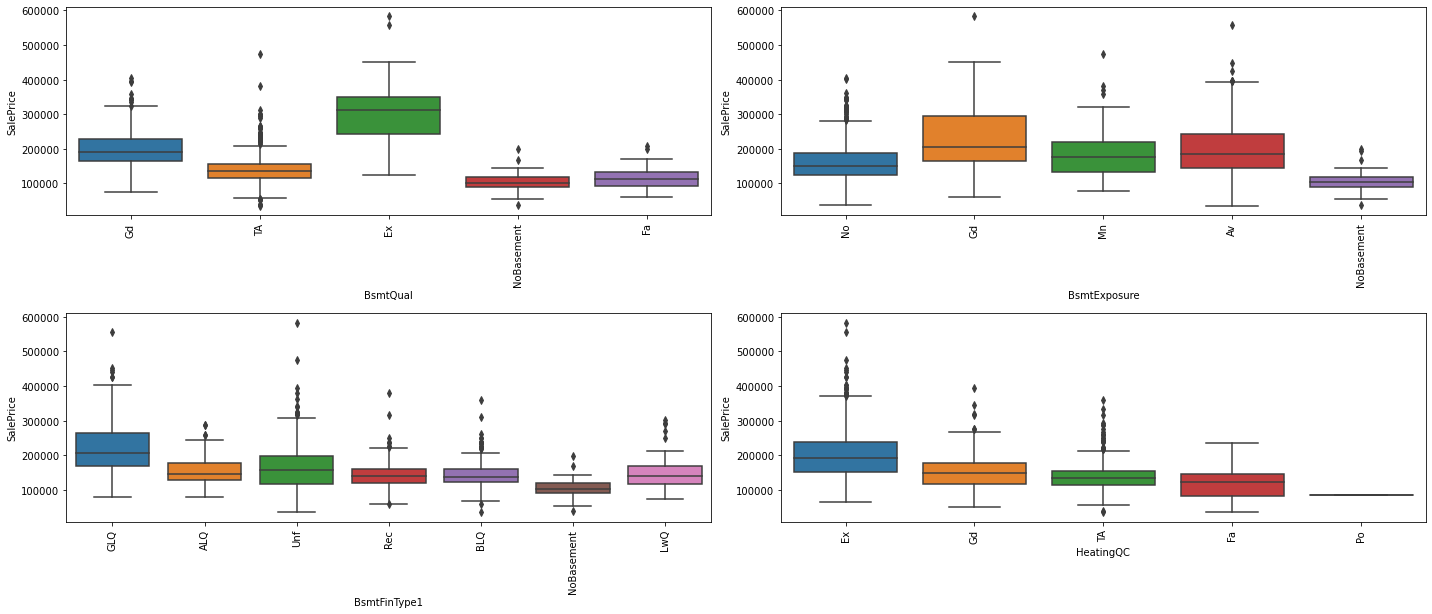

In [1342]:
ext_col = ['BsmtQual', 'BsmtExposure', 'BsmtFinType1','HeatingQC']

gen_boxplot(ext_col)

OBSERVATIONS:
    
   - 'BsmtQual' with excellent(EX)-100+ inches in the height of the basement have high SalePrice.
   - 'HeatingQC' Houses having excellent heating quality have the highest SalePrice.
   - Housing with good living quarters ('BsmtFinType1'= GLQ) have highest SalePrice.

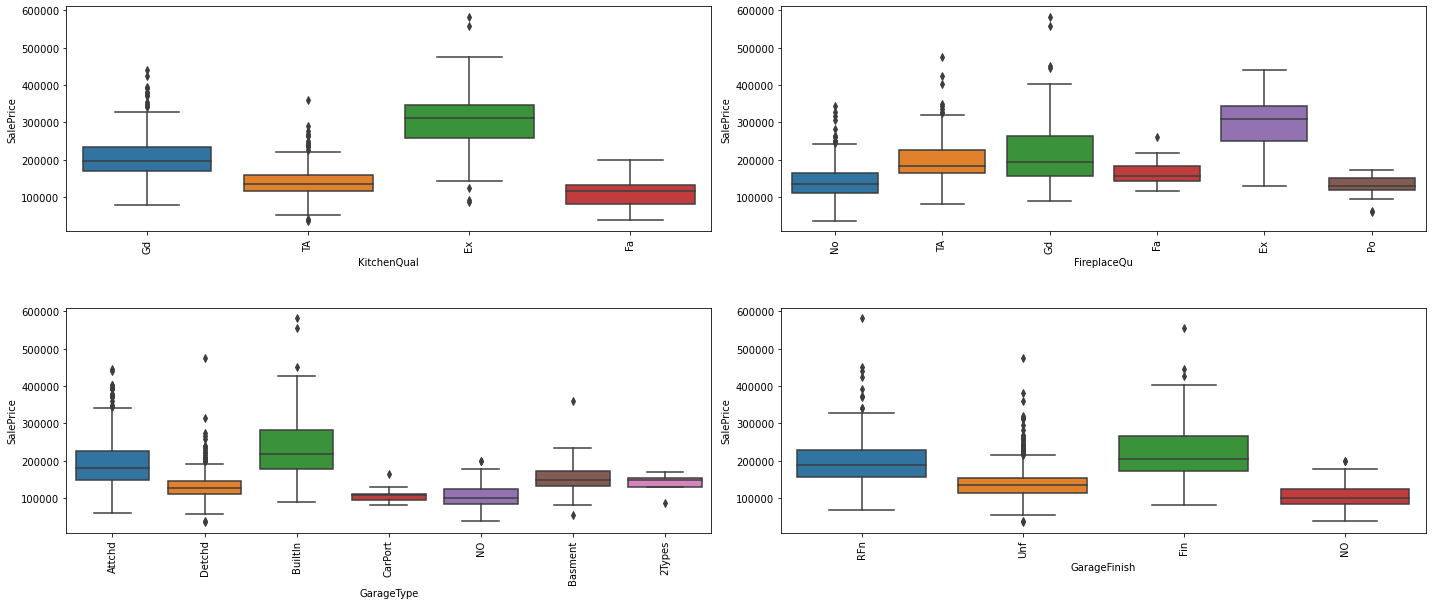

In [1343]:
ext_col = ['KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']

gen_boxplot(ext_col)

OBSERVATIONS:
    
   - SalePrice is highest where garage is finished.
   - The location of the garage in the Basament have the high SalePrice.
   - Houses having excellent heating quality and kitchen quality have the highest SalePrice.

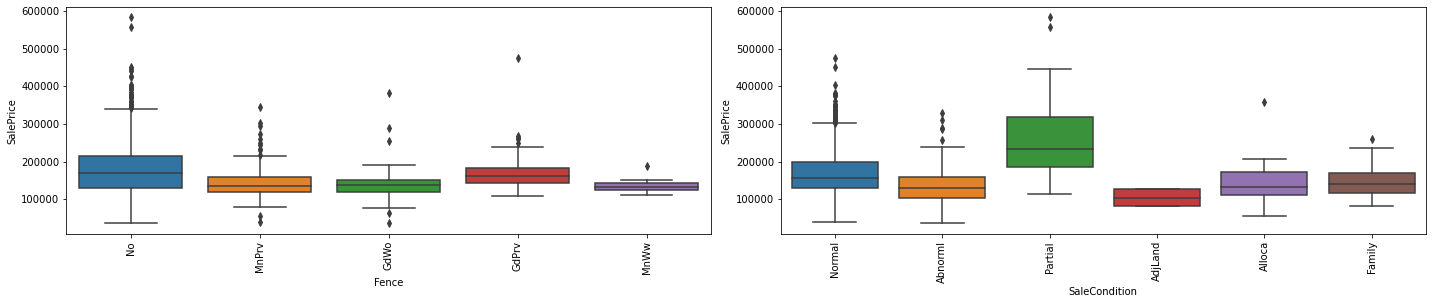

In [1344]:
ext_col = ['Fence', 'SaleCondition']

gen_boxplot(ext_col)

OBSERVATION:
    
    Most of the houses do not have fence (Fence= Not_applicable).
    

## Encoding of Categorical Features

#### Encoding For Categorical Variables Ordered Features -- to be label encoded 
'LotShape', 'HouseStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'Fence', 'LotConfig', 'MasVnrType', 'SaleCondition'.

In [1345]:
#Ordered Features

house_df['LotShape'] = house_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house_df['HouseStyle'] = house_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
house_df['ExterQual'] = house_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['BsmtQual'] = house_df['BsmtQual'].map({'NoBasement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtExposure'] = house_df['BsmtExposure'].map({'NoBasement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].map({'NoBasement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['HeatingQC'] = house_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['KitchenQual'] = house_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['GarageFinish'] = house_df['GarageFinish'].map({'NO':0,'Unf':1,'RFn':2,'Fin':3})
house_df['FireplaceQu'] = house_df['FireplaceQu'].map({'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BldgType'] = house_df['BldgType'].map({'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3,'2fmCon':4})
house_df['Fence'] = house_df['Fence'].map({'No':0,'MnPrv':1,'GdPrv':2,'GdWo':3,'MnWw':4})
house_df['LotConfig'] = house_df['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
house_df['MasVnrType'] = house_df['MasVnrType'].map({'None':0,'BrkFace':1,'Stone':2,'BrkCmn':3})
house_df['SaleCondition'] = house_df['SaleCondition'].map({'Normal':0,'Partial':1,'Abnorml':2,'Family':3,'Alloca':4,'AdjLand':5})



In [1346]:
# Checking the features after encoding

house_df[['LotShape', 'HouseStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'Fence', 'LotConfig', 'MasVnrType', 'SaleCondition']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotShape       1358 non-null   int64
 1   HouseStyle     1358 non-null   int64
 2   ExterQual      1358 non-null   int64
 3   BsmtQual       1358 non-null   int64
 4   BsmtExposure   1358 non-null   int64
 5   BsmtFinType1   1358 non-null   int64
 6   HeatingQC      1358 non-null   int64
 7   KitchenQual    1358 non-null   int64
 8   FireplaceQu    1358 non-null   int64
 9   GarageFinish   1358 non-null   int64
 10  BldgType       1358 non-null   int64
 11  Fence          1358 non-null   int64
 12  LotConfig      1358 non-null   int64
 13  MasVnrType     1358 non-null   int64
 14  SaleCondition  1358 non-null   int64
dtypes: int64(15)
memory usage: 202.0 KB


In [1347]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,Remodelled,Age_BuildOrRemod,NewOrOld_Garage
0,60,RL,65.0,8450,3,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,1,196.0,3,PConc,4,1,6,706,150,4,856,854,1,2,1,3,3,8,0,0,Attchd,2,548,0,61,0,2,0,208500,0,5,1
1,20,RL,80.0,9600,3,3,Veenker,0,0,6,8,Gable,MetalSd,MetalSd,0,0.0,2,CBlock,4,4,5,978,284,4,1262,0,0,2,0,3,2,6,1,3,Attchd,2,460,298,0,0,5,0,181500,0,31,0
2,60,RL,68.0,11250,0,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,1,162.0,3,PConc,4,2,6,486,434,4,920,866,1,2,1,3,3,6,1,3,Attchd,2,608,0,42,0,9,0,223500,1,6,1
3,70,RL,60.0,9550,0,1,Crawfor,0,3,7,5,Gable,Wd Sdng,Wd Shng,0,0.0,2,BrkTil,3,1,5,216,540,3,961,756,1,1,0,3,3,7,1,4,Detchd,1,642,0,35,0,2,2,140000,1,36,0
4,60,RL,84.0,14260,0,3,NoRidge,0,3,8,5,Gable,VinylSd,VinylSd,1,350.0,3,PConc,4,3,6,655,490,4,1145,1053,1,2,1,4,3,9,1,3,Attchd,2,836,192,84,0,12,0,250000,0,8,1


#### Unordered Features -- to be one hot encoded 
'MSZoning', 'Neighborhood','RoofStyle','Exterior1st', 'Exterior2nd', 'Foundation','GarageType'.

In [1348]:
unordered_features = ['MSZoning', 'Neighborhood','RoofStyle','Exterior1st', 'Exterior2nd', 'Foundation','GarageType']


In [1349]:
dummy_df = pd.get_dummies(house_df[unordered_features], drop_first=True)

In [1350]:
dummy_df.shape

(1358, 73)

In [1351]:
# Adding the dummy variables to the original dataframe
house_df = pd.concat([house_df,dummy_df],axis=1)

# Dropping the redundant columns
house_df = house_df.drop(unordered_features,axis=1)

In [1352]:
house_df.shape

(1358, 112)

In [1353]:
house_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,Remodelled,Age_BuildOrRemod,NewOrOld_Garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO
0,60,65.0,8450,3,0,0,3,7,5,1,196.0,3,4,1,6,706,150,4,856,854,1,2,1,3,3,8,0,0,2,548,0,61,0,2,0,208500,0,5,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,3,0,0,6,8,0,0.0,2,4,4,5,978,284,4,1262,0,0,2,0,3,2,6,1,3,2,460,298,0,0,5,0,181500,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,0,0,0,3,7,5,1,162.0,3,4,2,6,486,434,4,920,866,1,2,1,3,3,6,1,3,2,608,0,42,0,9,0,223500,1,6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,0,1,0,3,7,5,0,0.0,2,3,1,5,216,540,3,961,756,1,1,0,3,3,7,1,4,1,642,0,35,0,2,2,140000,1,36,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,0,3,0,3,8,5,1,350.0,3,4,3,6,655,490,4,1145,1053,1,2,1,4,3,9,1,3,2,836,192,84,0,12,0,250000,0,8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


## Train_Test Split

In [1354]:
# Putting all the feature variable to X

X = house_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,Remodelled,Age_BuildOrRemod,NewOrOld_Garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO
0,60,65.0,8450,3,0,0,3,7,5,1,196.0,3,4,1,6,706,150,4,856,854,1,2,1,3,3,8,0,0,2,548,0,61,0,2,0,0,5,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,3,0,0,6,8,0,0.0,2,4,4,5,978,284,4,1262,0,0,2,0,3,2,6,1,3,2,460,298,0,0,5,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,0,0,0,3,7,5,1,162.0,3,4,2,6,486,434,4,920,866,1,2,1,3,3,6,1,3,2,608,0,42,0,9,0,1,6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,0,1,0,3,7,5,0,0.0,2,3,1,5,216,540,3,961,756,1,1,0,3,3,7,1,4,1,642,0,35,0,2,2,1,36,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,0,3,0,3,8,5,1,350.0,3,4,3,6,655,490,4,1145,1053,1,2,1,4,3,9,1,3,2,836,192,84,0,12,0,0,8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


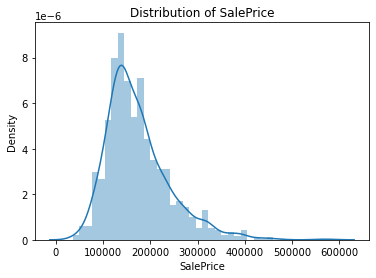

In [1355]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(house_df['SalePrice'])
plt.show()

#### Comment:  
        Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.



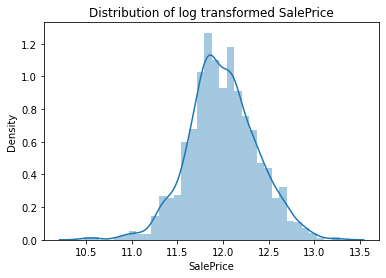

In [1356]:
sns.distplot(np.log(house_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [1357]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(house_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
54      11.775290
55      12.103486
56      12.058153
57      12

In [1358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=100)

In [1359]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(950, 111)
(408, 111)
(950,)
(408,)


### Feature Scaling

In [1360]:
scaler = StandardScaler()

X_train[['MSSubClass','LotFrontage','LotArea','LotShape','LotConfig','BldgType','HouseStyle','OverallQual','OverallCond','MasVnrType','MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','HeatingQC','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageFinish','GarageArea','WoodDeckSF','OpenPorchSF','Fence','MoSold','SaleCondition','Age_BuildOrRemod']] = scaler.fit_transform(X_train[['MSSubClass','LotFrontage','LotArea','LotShape','LotConfig','BldgType','HouseStyle','OverallQual','OverallCond','MasVnrType','MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','HeatingQC','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageFinish','GarageArea','WoodDeckSF','OpenPorchSF','Fence','MoSold','SaleCondition','Age_BuildOrRemod']])

X_test[['MSSubClass','LotFrontage','LotArea','LotShape','LotConfig','BldgType','HouseStyle','OverallQual','OverallCond','MasVnrType','MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','HeatingQC','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageFinish','GarageArea','WoodDeckSF','OpenPorchSF','Fence','MoSold','SaleCondition','Age_BuildOrRemod']] = scaler.transform(X_test[['MSSubClass','LotFrontage','LotArea','LotShape','LotConfig','BldgType','HouseStyle','OverallQual','OverallCond','MasVnrType','MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','HeatingQC','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageFinish','GarageArea','WoodDeckSF','OpenPorchSF','Fence','MoSold','SaleCondition','Age_BuildOrRemod']])


In [1361]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,Remodelled,Age_BuildOrRemod,NewOrOld_Garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO
28,-0.870436,-1.134517,1.924938,-1.381512,2.220595,-0.396412,-0.842006,-0.784505,0.400140,-0.724680,-0.632903,-0.671614,-0.52516,2.425529,0.233814,2.140759,-0.836005,-1.199396,1.380359,-0.799609,1.183427,-1.037659,-0.742371,-1.053583,-0.769721,-0.279558,2.253273,1.230043,0.343045,-0.689694,1.899039,3.841352,-0.433414,2.119010,-0.394912,1,-0.668463,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
347,-0.870436,-0.002113,2.281275,-1.381512,-0.524448,-0.396412,-0.842006,-0.031697,-0.507099,0.683185,-0.410566,-0.671614,-0.52516,-0.555393,0.233814,2.123519,-0.833678,0.891295,1.023565,-0.799609,1.183427,0.829341,-0.742371,0.202256,-0.769721,-0.279558,2.253273,1.230043,-0.784612,0.177761,-0.775925,-0.042514,-0.433414,2.119010,-0.394912,0,1.268373,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
873,-0.400932,-0.465369,0.761202,0.742172,-0.524448,-0.396412,-0.842006,-0.784505,1.307378,-0.724680,-0.632903,1.110602,-0.52516,-0.555393,-0.237785,-0.080773,-0.254102,-0.154051,-0.269082,-0.799609,-0.802891,-1.037659,-0.742371,0.202256,-0.769721,-0.279558,0.654610,1.230043,-0.784612,-0.839923,-0.775925,-0.256305,-0.433414,0.994186,-0.394912,1,1.752582,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
951,-0.870436,-0.465369,-0.449062,0.742172,0.848074,-0.396412,-0.842006,-0.784505,-0.507099,-0.724680,-0.632903,-0.671614,-0.52516,-0.555393,0.233814,0.574358,-0.882558,-0.154051,-0.476725,-0.799609,1.183427,-1.037659,-0.742371,0.202256,-0.769721,-0.279558,-0.944053,-0.990462,-0.784612,-0.781770,3.134352,-0.755150,0.795671,0.244304,2.373846,0,0.881006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1273,0.538077,2.828898,0.585123,-1.381512,0.848074,-0.396412,2.770471,-0.031697,1.307378,0.683185,-0.010360,-0.671614,-0.52516,1.431889,0.705412,0.766463,-0.619537,-0.154051,0.669695,-0.79960

In [1362]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,Remodelled,Age_BuildOrRemod,NewOrOld_Garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO
1434,-0.870436,0.564089,2.225554,0.742172,-0.524448,-0.396412,-0.842006,-0.784505,-0.507099,-0.724680,-0.632903,-0.671614,-0.525160,-0.555393,0.705412,1.300912,-0.875575,-2.244742,-0.005874,-0.799609,1.183427,0.829341,-0.742371,0.202256,-0.769721,-0.925737,0.654610,1.230043,0.343045,0.109915,1.964055,-0.024698,-0.433414,-0.505579,-0.394912,0,0.299955,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
386,-0.166180,-0.568315,-0.279113,0.742172,3.593117,-0.396412,0.190130,-0.784505,-2.321576,-0.724680,-0.632903,-0.671614,-0.525160,-0.555393,-1.180982,-1.004358,0.213748,-1.199396,-1.374559,0.466704,-0.802891,-1.037659,-0.742371,2.713935,-0.769721,1.012801,-0.944053,-0.990462,-1.912270,-2.235604,-0.775925,1.935051,-0.433414,-0.505579,6.526984,1,-0.620043,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1405,1.477086,-1.288936,-1.551784,-1.381512,-0.524448,0.748242,-0.842006,1.473918,-0.507099,2.091050,0.656650,1.110602,1.737435,2.425529,1.177011,2.377197,-0.803419,0.891295,1.514888,-0.799609,1.183427,0.829341,-0.742371,-1.053583,0.776230,-0.925737,0.654610,1.230043,1.470703,0.100223,0.412948,0.189092,-0.433414,-2.005344,-0.394912,1,-0.958989,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
952,0.655453,-0.465369,-0.616226,0.742172,-0.524448,-0.396412,2.254403,-0.784505,2.214617,-0.724680,-0.632903,-0.671614,0.606138,1.431889,1.177011,0.621153,-1.066439,-0.154051,-1.052860,-0.799609,-0.802891,-1.037659,-0.742371,-1.053583,-0.769721,-0.925737,-0.944053,-0.990462,1.470703,-0.316543,1.007384,-0.755150,0.795671,-0.880520,-0.394912,1,-0.813726,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
789,0.068572,-0.002113,0.778197,-1.381512,-0.524448,-0.396412,0.706199,-0.031697,2.214617,0.683185,0.530660,-0.671614,-0.525160,2.425529,-0.709383,0.394566,-0.703331,-0.154051,-0.444555,1.875

### Initial Feature Selection with RFE

Since there are 111 variables, we will use RFE to select some features.

In [1363]:
#Fit the model
lm=LinearRegression()

# fit model
lm.fit(X_train, y_train)

#Running RFE to select 60 number of varibles
rfe=RFE(lm, n_features_to_select=60)

rfe=rfe.fit(X_train,y_train)

In [1364]:
#All the columns selected by RFE is assigned to the variable 'RFE_col'.

RFE_col = X_train.columns[rfe.support_]

In [1365]:
X_train_rfe = X_train[RFE_col]

In [1366]:
#The obtained 60 columns are assigned to X_train and X_test for further analysis.

X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

In [1367]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(950, 60)
(408, 60)
(950,)
(408,)


## Model Building and Evaluation

## Ridge Regression

In [1368]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (950, 60)
y_train (950,)


In [1369]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1370]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,1.0,-0.077798,-0.083782,1
12,0.9,-0.077742,-0.083796,2
14,2.0,-0.078296,-0.083810,3
11,0.8,-0.077682,-0.083811,4
10,0.7,-0.077616,-0.083831,5
9,0.6,-0.077545,-0.083864,6
8,0.5,-0.077466,-0.083902,7
7,0.4,-0.077379,-0.083950,8
15,3.0,-0.078698,-0.083958,9
6,0.3,-0.077285,-0.084014,10


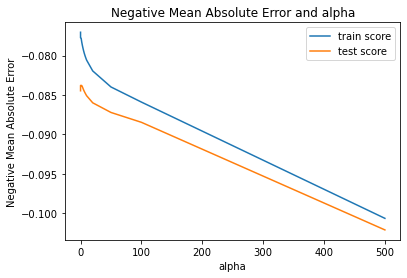

In [1371]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1372]:
ridge_model_cv.best_params_

{'alpha': 1.0}

In [1373]:
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.03138917,  0.08715461,  0.03852692,  0.03025993,  0.04426428,
        0.11016641,  0.10195649,  0.0382605 , -0.02950459, -0.03655365,
        0.04218503,  0.21363463,  0.11110057,  0.18704941,  0.14424944,
       -0.02834122, -0.11750687,  0.07322974, -0.07036355, -0.07861772,
       -0.19317918, -0.06878552, -0.03498487, -0.02659966, -0.03901194,
        0.08061625, -0.11123953, -0.04461171, -0.02574002,  0.06925705,
        0.03759101,  0.07961246,  0.03706896,  0.03192719, -0.02514327,
        0.06546959,  0.07100832, -0.0336034 ,  0.03584837,  0.04143697,
        0.04122618, -0.08888497,  0.0505849 , -0.05439456, -0.05715475,
        0.03444362,  0.070426  ,  0.09667542,  0.05526746,  0.05184072,
        0.07721356,  0.06911265,  0.03373654,  0.0784475 ,  0.08234438,
        0.0943194 ,  0.03910006,  0.09949596,  0.02375282,  0.05658981])

In [1374]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.017569483940712626

In [1375]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0314
1,OverallQual,0.0872
2,OverallCond,0.0385
3,BsmtQual,0.0303
4,BsmtFinSF1,0.0443
5,1stFlrSF,0.1102
6,2ndFlrSF,0.1020
7,GarageArea,0.0383
8,Remodelled,-0.0295
9,Age_BuildOrRemod,-0.0366


In [1376]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0314,
 'OverallQual': 0.0872,
 'OverallCond': 0.0385,
 'BsmtQual': 0.0303,
 'BsmtFinSF1': 0.0443,
 '1stFlrSF': 0.1102,
 '2ndFlrSF': 0.102,
 'GarageArea': 0.0383,
 'Remodelled': -0.0295,
 'Age_BuildOrRemod': -0.0366,
 'NewOrOld_Garage': 0.0422,
 'MSZoning_FV': 0.2136,
 'MSZoning_RH': 0.1111,
 'MSZoning_RL': 0.187,
 'MSZoning_RM': 0.1442,
 'Neighborhood_Blueste': -0.0283,
 'Neighborhood_BrDale': -0.1175,
 'Neighborhood_Crawfor': 0.0732,
 'Neighborhood_Edwards': -0.0704,
 'Neighborhood_IDOTRR': -0.0786,
 'Neighborhood_MeadowV': -0.1932,
 'Neighborhood_Mitchel': -0.0688,
 'Neighborhood_NAmes': -0.035,
 'Neighborhood_NPkVill': -0.0266,
 'Neighborhood_NWAmes': -0.039,
 'Neighborhood_NridgHt': 0.0806,
 'Neighborhood_OldTown': -0.1112,
 'Neighborhood_Sawyer': -0.0446,
 'Neighborhood_SawyerW': -0.0257,
 'Neighborhood_StoneBr': 0.0693,
 'RoofStyle_Gable': 0.0376,
 'RoofStyle_Gambrel': 0.0796,
 'RoofStyle_Hip': 0.0371,
 'RoofStyle_Mansard': 0.0319,
 'RoofStyle_Shed': -0.0251,
 'Exte

In [1377]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [1378]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
2,MSZoning_FV,True,1,0.2136
4,MSZoning_RL,True,1,0.1870
5,MSZoning_RM,True,1,0.1442
3,MSZoning_RH,True,1,0.1111
1,1stFlrSF,True,1,0.1102
13,GarageType_BuiltIn,True,1,0.0995
12,GarageType_Attchd,True,1,0.0943
0,OverallQual,True,1,0.0872
11,Foundation_Stone,True,1,0.0823
10,Foundation_PConc,True,1,0.0784


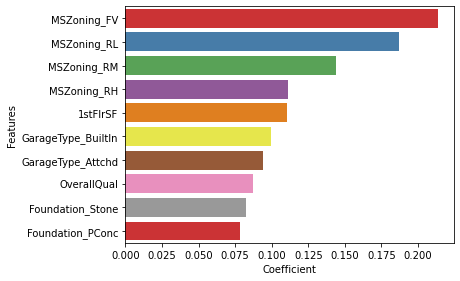

In [1379]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()


The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

### Lasso Regression

In [1380]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1381]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.077739,-0.084343,1
1,0.0002,-0.078568,-0.084583,2
2,0.0003,-0.079296,-0.084717,3
3,0.0004,-0.080079,-0.084975,4
4,0.0005,-0.080709,-0.085227,5
5,0.001,-0.082861,-0.086441,6
6,0.002,-0.085471,-0.088806,7
7,0.003,-0.087473,-0.090050,8
8,0.004,-0.088304,-0.090828,9
9,0.005,-0.089036,-0.091674,10


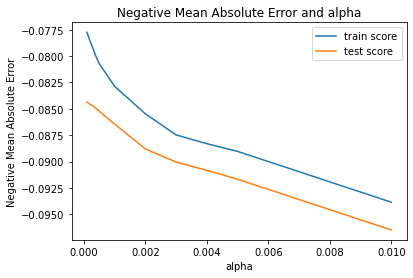

In [1382]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

In [1383]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [1384]:
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [1385]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.03099032,  0.08678025,  0.03777955,  0.03041867,  0.04367387,
        0.10979805,  0.10147741,  0.03945199, -0.02844651, -0.03651167,
        0.04175107,  0.28673392,  0.18115338,  0.2569486 ,  0.21034398,
       -0.        , -0.11396505,  0.07513742, -0.06830923, -0.06024035,
       -0.20303   , -0.0649151 , -0.03153762, -0.00985307, -0.03323523,
        0.08042956, -0.10742564, -0.04094432, -0.02082093,  0.07142444,
        0.00557785,  0.04743494,  0.00597442,  0.        , -0.01509284,
        0.        ,  0.06099621, -0.        ,  0.02131549,  0.02772034,
        0.02297524, -0.08753801,  0.03690244, -0.05896717, -0.06762796,
        0.01754903,  0.06371373,  0.05468287,  0.00646023,  0.03405105,
        0.06878777,  0.06571924,  0.0326545 ,  0.07805754,  0.10141948,
        0.09152963,  0.03526522,  0.09685266,  0.        ,  0.05377076])

In [1386]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01713693586437798

In [1387]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0310
1,OverallQual,0.0868
2,OverallCond,0.0378
3,BsmtQual,0.0304
4,BsmtFinSF1,0.0437
5,1stFlrSF,0.1098
6,2ndFlrSF,0.1015
7,GarageArea,0.0395
8,Remodelled,-0.0284
9,Age_BuildOrRemod,-0.0365


In [1388]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.03099032122190403,
 'OverallQual': 0.0867802548531614,
 'OverallCond': 0.03777955241236215,
 'BsmtQual': 0.03041866501316017,
 'BsmtFinSF1': 0.04367387121394029,
 '1stFlrSF': 0.10979804812867881,
 '2ndFlrSF': 0.10147740855909065,
 'GarageArea': 0.03945198585840656,
 'Remodelled': -0.028446513760268202,
 'Age_BuildOrRemod': -0.03651167009603275,
 'NewOrOld_Garage': 0.041751067346782314,
 'MSZoning_FV': 0.2867339215436112,
 'MSZoning_RH': 0.18115337854627148,
 'MSZoning_RL': 0.2569485969900233,
 'MSZoning_RM': 0.2103439771048873,
 'Neighborhood_Blueste': -0.0,
 'Neighborhood_BrDale': -0.11396505216215586,
 'Neighborhood_Crawfor': 0.0751374171556092,
 'Neighborhood_Edwards': -0.06830923449846243,
 'Neighborhood_IDOTRR': -0.06024034504000097,
 'Neighborhood_MeadowV': -0.20302999817910178,
 'Neighborhood_Mitchel': -0.06491510237841716,
 'Neighborhood_NAmes': -0.03153761507172572,
 'Neighborhood_NPkVill': -0.009853074150174787,
 'Neighborhood_NWAmes': -0.03323522597856739,
 'Ne

In [1389]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1390]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,MSZoning_FV,True,1,0.286734
4,MSZoning_RL,True,1,0.256949
5,MSZoning_RM,True,1,0.210344
3,MSZoning_RH,True,1,0.181153
1,1stFlrSF,True,1,0.109798
11,Foundation_Stone,True,1,0.101419
13,GarageType_BuiltIn,True,1,0.096853
12,GarageType_Attchd,True,1,0.091530
0,OverallQual,True,1,0.086780
10,Foundation_PConc,True,1,0.078058


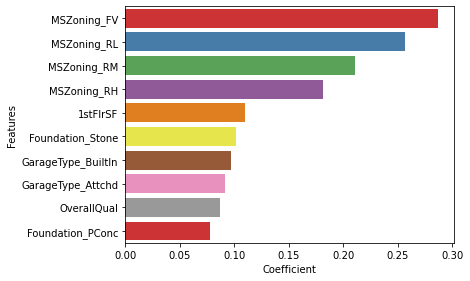

In [1391]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

In [1392]:
alpha =0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_test_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.9114599482749374

In [1393]:
alpha =0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9163634457980351

#### r2 score: 
This is used to evaluate the performance of a linear regression model. It is the amount of the variation in the dependent variable which is predictable from the independent variables.And the value lies between 0 to 1. In general,the higher the r-squared, the better the model fits the data.

## Conclusion :

We have finalised the independent variables which are significant in predicting the SalePrices. And evaluated how well those variables describe the Price.

#### Since r2 score in train and test sets are very similar and significantly high.We can conclude that, what the model has learnt in the Training set is also able to generalize well on the Test set.
From R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 91% variation of SalePrice.
So it recomended to give these variables utmost importance while planning to achieve maximum SalePrice.

The optimal lambda value in case of Ridge and Lasso is as below:

- Ridge - 1.0
- Lasso - 0.0001

The Mean Squared error in case of Ridge and Lasso are:

- Ridge - 0.017569
- Lasso - 0.017136

The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of one of the lasso's feature to be shrunk toward 0) and helps to increase model interpretation by taking the magnitude of the coefficients, Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the SalePrice are:

- MSZoning_FV	
- 1stFlrSF	True	
- Foundation_Stone
- MSZoning_RH
- GarageType_BuiltIn
- MSZoning_RL
- GarageType_Attchd	
- OverallQual
- MSZoning_RM
- Foundation_PConc


### Therefore, the variables predicted by Lasso in the above mentioned  are the significant variables for predicting the price of a house and it is recomended to give these variables utmost importance while planning to achieve maximum SalePrice.

### SUBJECTIVE QUESTIONS WORKED ON

Question:1
    What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [1394]:
#Let's create a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)

y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)

print("Train R2 Score: ", round(r2_score(y_true=y_train,y_pred=y_train_pred_doubled), 4))
print("Test R2 Score: ", round(r2_score(y_true=y_test,y_pred=y_test_pred_doubled), 4))

print("Mean Squared Error: ",round(mean_squared_error(y_test, lasso.predict(X_test)),6))                                 



Train R2 Score:  0.9105
Test R2 Score:  0.8826
Mean Squared Error:  0.012338


In [1395]:
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)

In [1396]:
print("Top correlated features:")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features:
                      Coefficient
MSZoning_FV              0.178518
MSZoning_RL              0.151996
1stFlrSF                 0.109591
MSZoning_RM              0.102018
2ndFlrSF                 0.101527
OverallQual              0.090558
GarageType_BuiltIn       0.087036
GarageType_Attchd        0.084259
Neighborhood_Crawfor     0.078749
Neighborhood_NridgHt     0.074785


In [1397]:
#Let's create a ridge model with alpha  = 2.0
ridge_doubled = Ridge(alpha = 2.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)

print("Train R2 Score: ", round(r2_score(y_true=y_train,y_pred=y_train_ridge_pred_doubled), 4))
print("Test R2 Score: ", round(r2_score(y_true=y_test,y_pred=y_test_ridge_pred_doubled), 4))

print("Mean Squared Error: ",round(mean_squared_error(y_test, ridge.predict(X_test)),6))

Train R2 Score:  0.9115
Test R2 Score:  0.8812
Mean Squared Error:  0.017569


In [1398]:
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)

In [1399]:
print("Top correlated features:")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features:
                      Coefficient
MSZoning_FV              0.157879
MSZoning_RL              0.134871
1stFlrSF                 0.110287
2ndFlrSF                 0.101864
GarageType_BuiltIn       0.091498
OverallQual              0.089462
GarageType_Attchd        0.088470
MSZoning_RM              0.087352
Foundation_PConc         0.076001
Neighborhood_NridgHt     0.075902


Question: 3 After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1400]:
X_train_new = X_train.drop(columns = ['MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_RH', '1stFlrSF'])
X_test_new = X_test.drop(columns = ['MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_RH', '1stFlrSF'])

In [1401]:
lasso_new = Lasso(alpha=0.001)
lasso_new.fit(X_train_new,y_train)

y_train_pred_new = lasso_new.predict(X_train_new)
y_test_pred_new = lasso_new.predict(X_test_new)

print("Train R2 Score: ", round(r2_score(y_true=y_train,y_pred=y_train_pred_new), 4))
print("Test R2 Score: ", round(r2_score(y_true=y_test,y_pred=y_test_pred_new), 4))

Train R2 Score:  0.8671
Test R2 Score:  0.8374


In [1402]:
lasso_coef_new_df = pd.DataFrame(lasso_new.coef_ , columns = ['Coefficient'], index =  X_train_new.columns)

In [1405]:
print("Top 5 correlated features:")
print(lasso_coef_new_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features:
                      Coefficient
OverallQual              0.144017
Exterior1st_BrkFace      0.098408
Neighborhood_Crawfor     0.081772
Neighborhood_NridgHt     0.069887
GarageArea               0.068271
